In [1]:
import numpy as np
import xarray as xr   # xarray is an important library to handle and manage netCDF file format
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [2]:

# Load the NetCDF data
file_path = "sst.mnmean.nc"  
ds = xr.open_dataset(file_path)

# Define 'lons' and 'lats' variables
lons = ds['lon'][:]
lats = ds['lat'][:]

# Assuming the variable name is 'sst' (update if different)
sst = ds['sst'] 
# Select year range 1981-2020
sst = sst.sel(time=slice('1981-1-01', '2020-12-01'))
sst

<xarray.DataArray 'sst' (time: 480, lat: 89, lon: 180)>
[7689600 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2020-12-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

In [3]:
# Calculate climatology (monthly mean over all years)
sst_clim = sst.groupby('time.month').mean(dim='time')

# Calculate anomalies (deviation from climatology)
sst_anom = sst.groupby('time.month') - sst_clim

sst_anom

<xarray.DataArray 'sst' (time: 480, lat: 89, lon: 180)>
array([[[-1.1920929e-07, -1.1920929e-07, -1.1920929e-07, ...,
         -1.1920929e-07, -1.1920929e-07, -1.1920929e-07],
        [-1.1920929e-07, -1.1920929e-07, -1.1920929e-07, ...,
         -1.1920929e-07, -1.1920929e-07, -1.1920929e-07],
        [-1.1920929e-07, -1.1920929e-07, -1.1920929e-07, ...,
         -1.1920929e-07, -1.1920929e-07, -1.1920929e-07],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[-1.1920929e-07, -1.1920929e-07, -1.1920929e-07, ...,
         -1.1920929e-07, -1.1920929e-07, -1.1920929e-07],
        [-1.1920929e-07, -1.1920929e-07, -1.1920929e-07, ...,
         -1.1920929e-07, -1.1920929e-07, -1.1920929e-07],
        [-1.1920929e-07, -1.1920929e-07, -1.1920929e-07, ...,
         -1.1920929e-07, -1.1920929e-07, -1.1920929e-07],
...
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[-6.7567825e-04, -5.3954124e-04, -2.0861626e-04, ...,
         -3.0815601e-04, -4.9018860e-04, -6.8223476e-04],
        [-5.9223175e-04, -3.2651424e-04, -1.1920929e-07, ...,
         -1.1920929e-07, -2.6202202e-04, -5.5575371e-04],
        [-1.1920929e-07, -1.1920929e-07, -1.1920929e-07, ...,
         -1.1920929e-07, -1.1920929e-07, -1.1920929e-07],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2020-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [4]:
# This is for Selecting anomalies for August, you can try and see for any other months also
aug_anom = sst_anom.sel(time=sst_anom['time.month'] == 8)

aug_anom.to_numpy()
aug_anom.shape

(40, 89, 180)

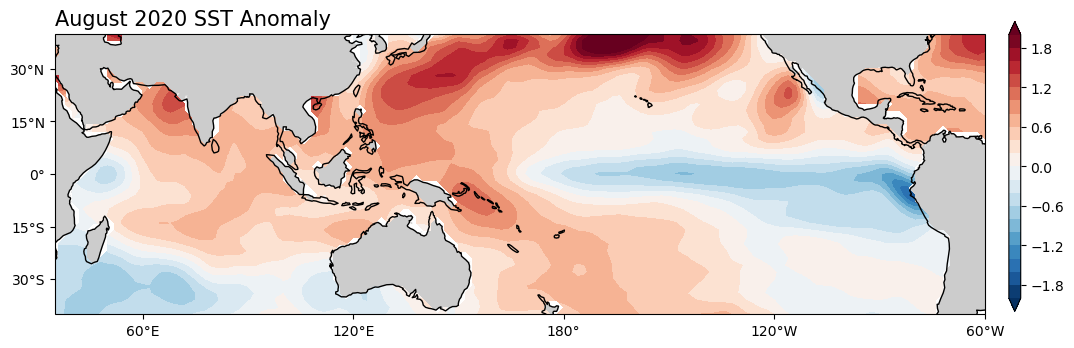

In [5]:
# Create the plot for August 2020 SST anomaly
#There are 40 values of Aug anomaly (40 years data). numpy array range will be from 0 to 39
# So for august 2020 you have to select- aug_anom[39,:,:] (similarly, for august 2019, select- aug_anom[38,:,:]..and so on...) 

fig = plt.figure(figsize=[12, 5])
ax1 = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
data_crs = ccrs.PlateCarree()
clevs = [-2, -1.8, -1.6, -1.4, -1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2]

ax1.set_title('August 2020 SST Anomaly', fontsize=15, loc='left')
cf1 = ax1.contourf(lons,lats, aug_anom[39,:,:],clevs,transform=data_crs,cmap='RdBu_r',extend='both')
ax1.coastlines()

# Set longitude and latitude extent
minlon = -145 + 180
maxlon = +120 + 180
ax1.set_extent([minlon, maxlon, -40, 40], ccrs.PlateCarree())

# Set tick marks for longitude and latitude
ax1.set_xticks([60, 120, 180, 240, 300], crs=ccrs.PlateCarree())
ax1.set_yticks([-30, -15, 0, 15, 30], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

# Add colorbar
cbar_ax = fig.add_axes([0.92, 0.22, 0.0099, 0.58])
cbar = fig.colorbar(cf1, cax=cbar_ax, orientation='vertical')

# Add land feature
ax1.add_feature(cf.LAND.with_scale('10m'), facecolor='grey', alpha=0.4)

# Show the plot
plt.show()